In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, FloatSlider
import SimpleITK as sitk 
import math
import pydicom

In [3]:
path = "B:\internship\PAT001"

In [4]:
reader = sitk.ImageSeriesReader() #create image reader object
filenamesDICOM = reader.GetGDCMSeriesFileNames(path) #get a series of file address
reader.SetFileNames(filenamesDICOM) #set all the address in image reader object
imgOriginal = reader.Execute() # read all the images

In [5]:
def sitk_show(img, title=None, margin=0.05, dpi=50 ):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1+ margin) * nda.shape[0] / dpi, (1+ margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(dpi=dpi,figsize=figsize)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin,])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)

In [6]:
img1 = imgOriginal[:,:,118]
img1_255 = sitk.Cast(sitk.RescaleIntensity(img1), sitk.sitkUInt8)

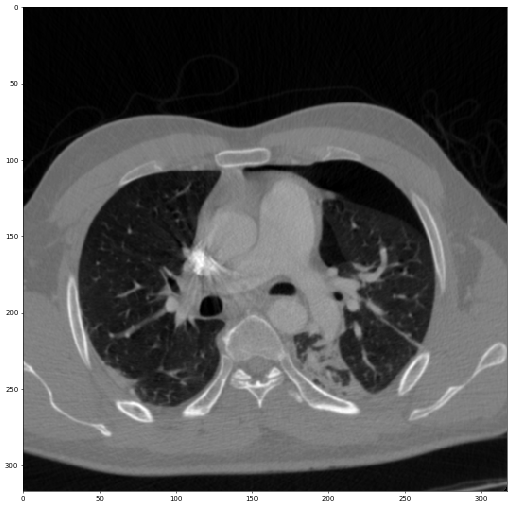

In [7]:
sitk_show(img1)

In [8]:
imgSmooth = sitk.CurvatureFlow(image1=img1,
                                    timeStep=0.0,
                                    numberOfIterations=5)

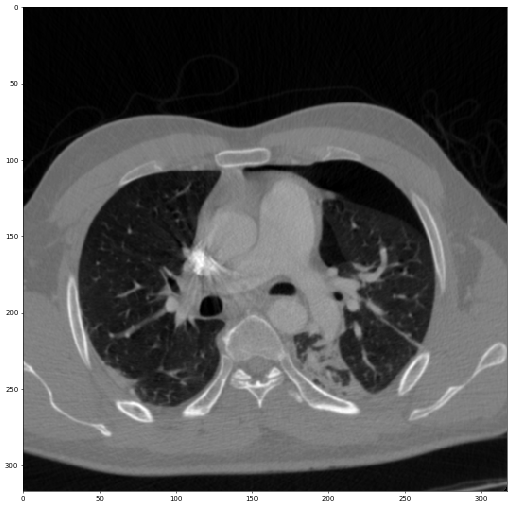

In [9]:
sitk_show(imgSmooth)

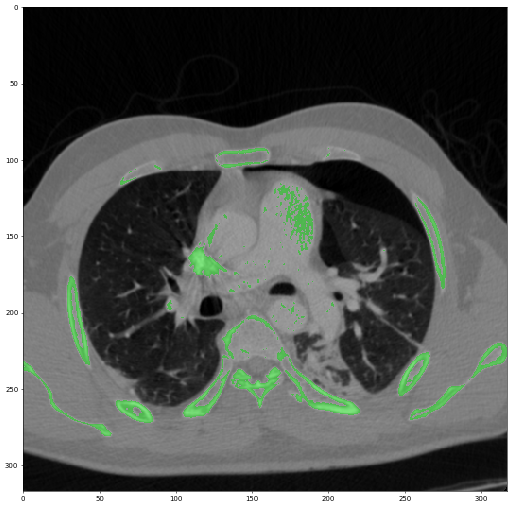

In [10]:
seg = img1>300
sitk_show(sitk.LabelOverlay(img1_255, seg), "Basic Thresholding")

In [11]:
seg = sitk.BinaryThreshold(img1, lowerThreshold=100, upperThreshold=400, insideValue=1, outsideValue=0)

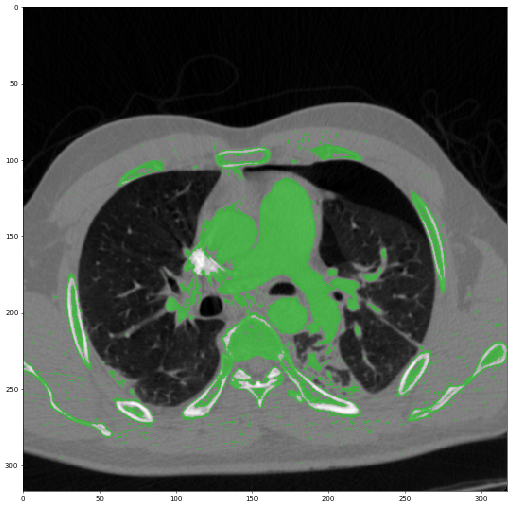

In [12]:
sitk_show(sitk.LabelOverlay(img1_255, seg), "Binary Thresholding")

In [13]:
otsu_filter = sitk.OtsuThresholdImageFilter()
otsu_filter.SetInsideValue(0)
otsu_filter.SetOutsideValue(1)
seg = otsu_filter.Execute(img1)
print(otsu_filter.GetThreshold() )

-426.0


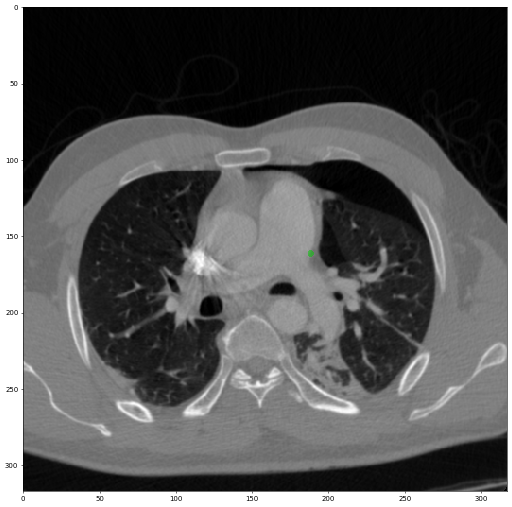

In [14]:
seed = (304,260)
seg = sitk.Image(img1.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(img1)
seg[seed] = 1
seg = sitk.BinaryDilate(seg, 3)
sitk_show(sitk.LabelOverlay(img1_255, seg), "Initial Seed")



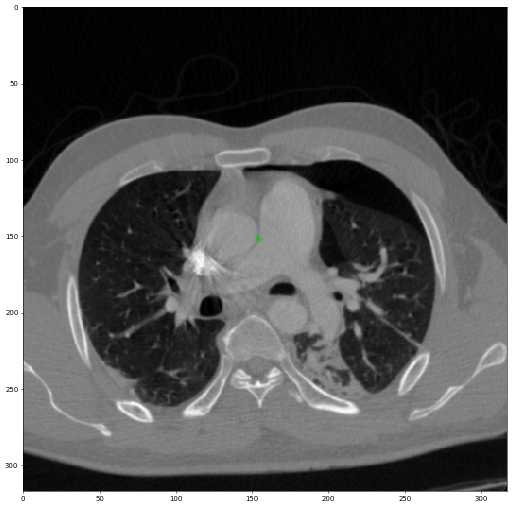

In [15]:
seed = (249,245)
seg = sitk.Image(img1.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(img1)
seg[seed] = 1
seg = sitk.BinaryDilate(seg, 3)
sitk_show(sitk.LabelOverlay(img1_255, seg), "Initial Seed")

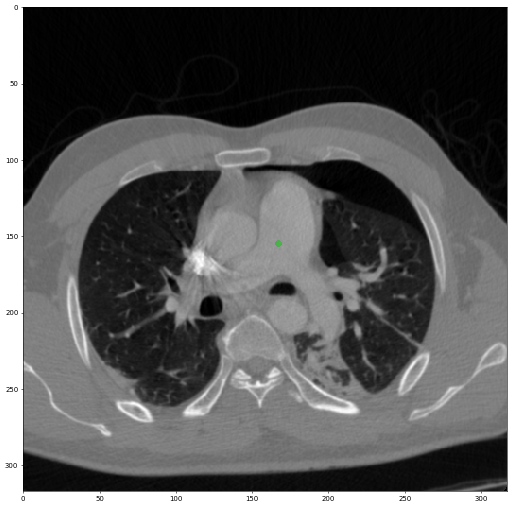

In [16]:
seed = (270,250)
seg = sitk.Image(img1.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(img1)
seg[seed] = 1
seg = sitk.BinaryDilate(seg, 3)
sitk_show(sitk.LabelOverlay(img1_255, seg), "Initial Seed")

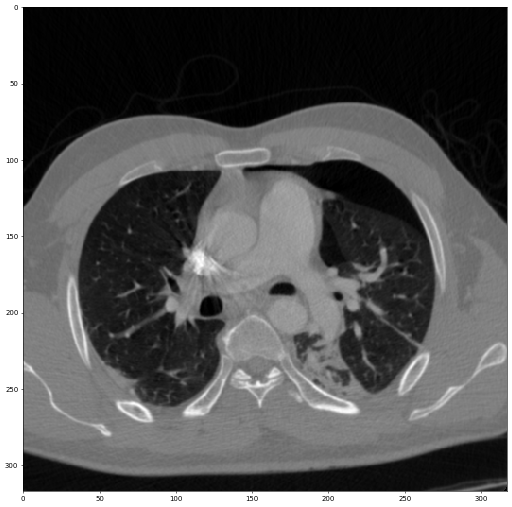

In [17]:


seg = sitk.ConnectedThreshold(img1, seedList=[seed], lower=100, upper=190)
sitk_show(sitk.LabelOverlay(img1_255, seg), "Connected Threshold")



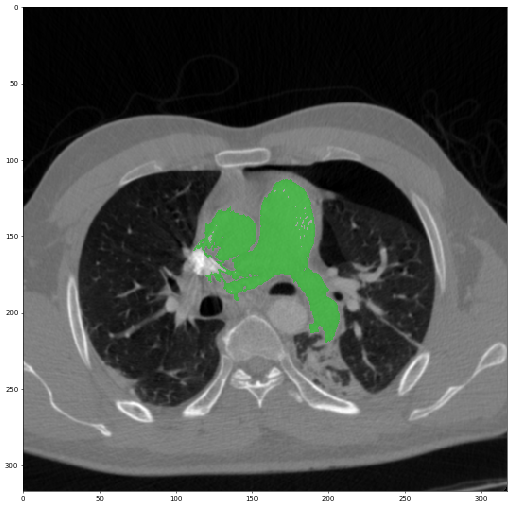

In [18]:


seg = sitk.ConfidenceConnected(img1, seedList=[seed],
                                   numberOfIterations=1,
                                   multiplier=3.125,
                                   initialNeighborhoodRadius=1,
                                   replaceValue=1)

sitk_show(sitk.LabelOverlay(img1_255, seg), "ConfidenceConnected")



In [19]:
def calc(ImageDim, StadionDim, Point):
    return (Point[0] * StadionDim[0]/ImageDim[0], Point[1] * StadionDim[1]/ImageDim[1])

In [20]:
Point_one = calc((300,300), (-120.799999,-158.5), (249, 245))
Point_two = calc((300,300), (-120.799999,-158.5), (304, 260))
Distance = math.sqrt((Point_one[0]-Point_two[0])**2 + (Point_one[1]-Point_two[1])**2)
print(Distance)

23.52191449104431


In [21]:
ds = pydicom.filereader.dcmread("B:\internship\PAT001\D0118.dcm")

In [22]:
print(ds)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELICAL']
(0008, 0012) Instance Creation Date              DA: '0'
(0008, 0013) Instance Creation Time              TM: '174456.703'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.36575964112688468819954397911791824991
(0008, 0020) Study Date                          DA: '0'
(0008, 0022) Acquisition Date                    DA: '0'
(0008, 0023) Content Date                        DA: '0'
(0008, 0030) Study Time                          TM: '0'
(0008, 0032) Acquisition Time                    TM: '0'
(0008, 0033) Content Time                        TM: '0'
(0008, 0050) Accession Number                    SH: '0'
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) Manufacturer                        LO: '0'
(0008, 0080) 